## Importando librerías

In [1]:
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, array_to_img,
                                                  img_to_array, load_img)
import matplotlib.pyplot as plt

## Data Generator

In [2]:
datagen = ImageDataGenerator(
        rotation_range=40, # Rango de rotación
        width_shift_range=0.2, # Rango de traslación horizontal
        height_shift_range=0.2, # Rango de traslación vertical
        zoom_range=0.2, # Rango de zoom
        horizontal_flip=True, # Volteo horizontal
        fill_mode='nearest', # Modo de relleno
        brightness_range=[0.4, 1.5]) # Rango de brillo

## Generador basado en imagen

In [3]:
img = load_img('../data/Mara.jpeg') # Carga la imagen
x = img_to_array(img) # Convierte la imagen a un array
print(x.shape) # (altura, anchura, canales)
x = x.reshape((1,) + x.shape) # Añade una dimensión extra al array
print(x.shape) # (1, altura, anchura, canales)

(800, 600, 3)
(1, 800, 600, 3)


## Generador basado en directorio

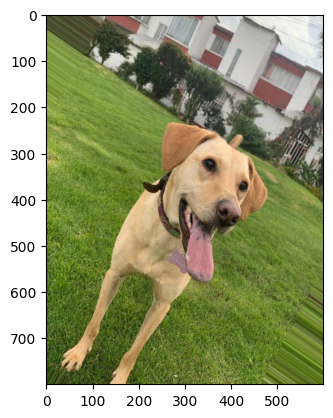

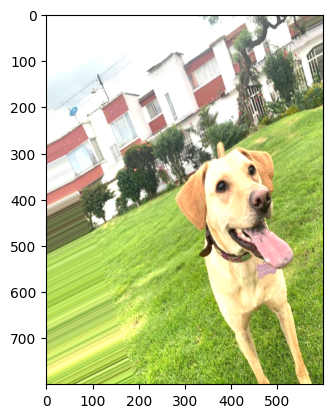

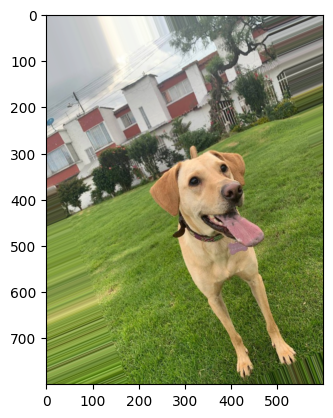

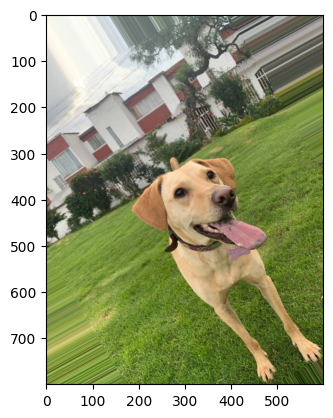

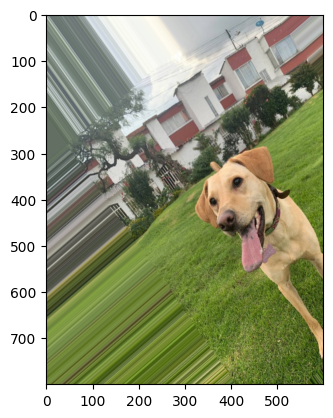

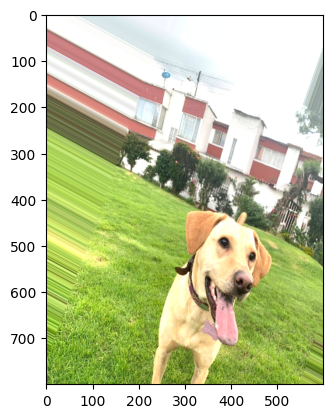

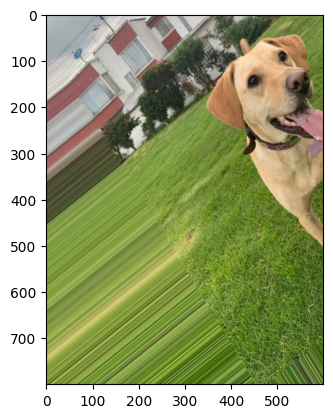

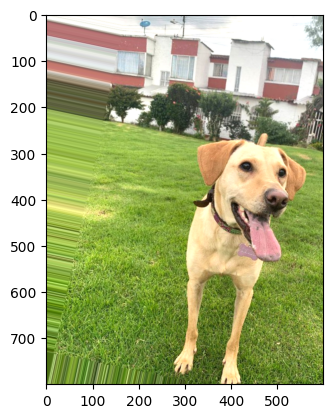

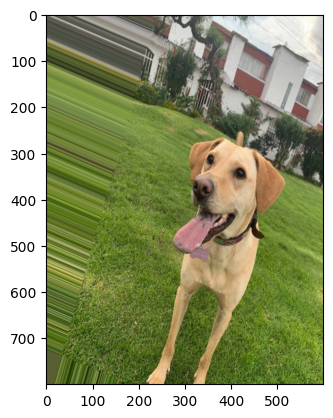

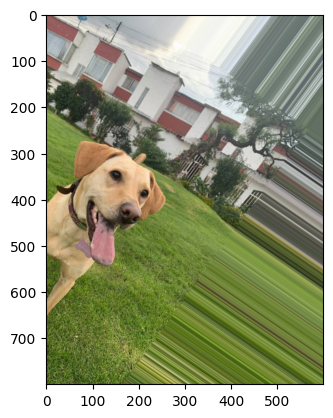

In [4]:
# Iteramos sobre nuestro generador de imágenes
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [5]:
train_generator = datagen.flow_from_directory(
        '../data/cats_and_dogs/train', # Directorio de entrenamiento
        target_size=(150, 150), # Tamaño de las imágenes
        batch_size=32, # Tamaño de los lotes
        class_mode='binary') # Modo de clasificación

Found 2000 images belonging to 2 classes.


In [6]:
train_generator[0][0].shape

(32, 150, 150, 3)

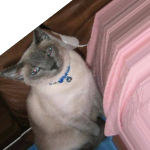

In [8]:
# Muestra una imagen del generador
array_to_img(train_generator[0][0][1])
